### Agricultural-crops-image-classification
- azure-cognitiveservices-vision-customvision

##### Please install the required Python modules/SDKs

In [1]:
"""
!pip install azure-cognitiveservices-vision-customvision
"""

"""
! activate ai-azure-c1

import sys

sys.path.append("/opt/conda/envs/ai-azure-c1/lib/python3.8/site-packages")
"""

'\n! activate ai-azure-c1\n\nimport sys\n\nsys.path.append("/opt/conda/envs/ai-azure-c1/lib/python3.8/site-packages")\n'

##### Importing utility functions and Python modules

In [2]:
import requests
from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [3]:
def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(2,1))
    plt.imshow(img)
    plt.show()

##### Importing Custom Vision Modules

In [4]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials
import os, time, uuid

In [5]:
training_key = "---"

##### Please enter prediction resource specific details below

In [6]:
# Replace with valid values
ENDPOINT = "---------------------------------------------"
prediction_key = "---------------------------------------------"
prediction_resource_id = "---------------------------------------------"

In [7]:
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(ENDPOINT, prediction_credentials)

In [8]:
predictor.api_version

'3.1'

##### To use a test image from local file system ...
- We have saved several test images within this workspace environment.

In [9]:
!ls

image-test-1.jpg  image-test-2.jpg  L5Demo1-PredictAPId-1.ipynb


In [10]:
#local_image_path = os.path.abspath("5Demo1-PredictAPId-1.ipynb")
local_image_path = os.getcwd()
file_name = 'image-test-1.jpg'

In [11]:
project_id = '42713de6-565a-44f2-9792-1aefd445bebd'
publish_iteration_name = "agrcropimgclas-Iteration1"

In [12]:
with open(os.path.join (local_image_path, file_name), "rb") as image_contents:
    results = predictor.classify_image(project_id, publish_iteration_name, image_contents.read())

    # Display the results.
    for prediction in results.predictions:
        print("\t" + prediction.tag_name +
              ": {0:.2f}%".format(prediction.probability * 100))

	wheat: 97.85%
	maize: 1.11%
	cotton: 0.75%
	Olive-tree: 0.23%
	tomato: 0.06%


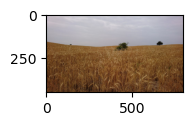

In [13]:
with open(os.path.join (local_image_path, file_name), 'rb') as img_code:
    img_view_ready = Image.open(img_code)
    plt.figure(figsize=(2, 1))
    plt.imshow(img_view_ready)

###### To use a test image from the Internet ...
* The test image used is
https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Green_wheat.jpg/399px-Green_wheat.jpg

In [14]:
test_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Green_wheat.jpg/399px-Green_wheat.jpg"

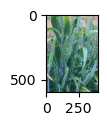

In [15]:
show_image_in_cell(test_image_url)

In [16]:
results = predictor.classify_image_url(project_id,publish_iteration_name,url=test_image_url)

In [17]:
# Display the results form the URL image
for prediction in results.predictions:
    print("\t" + prediction.tag_name +
          ": {0:.2f}%".format(prediction.probability * 100))

	wheat: 75.99%
	maize: 22.65%
	cotton: 0.97%
	Olive-tree: 0.28%
	tomato: 0.11%
